In [84]:
import numpy as np
import math
import matplotlib.pyplot as plt
from skimage import io, color

In [85]:
def gradient_info(img):
    height=img.shape[0]
    width=img.shape[1]
    magnitude=[]
    direction=[]

    for j in range(height):
        mag_temp=[]
        dir_temp=[]
        for i in range(width):
            Gx=0
            Gy=0

            # compute Gx= Img(x+1,y)- Img(x-1,y)
            if i+1>=width and i>0:
                Gx= - img[j][i-1]
            elif i+1< width and i==0:
                Gx= img[j][i+1]
            else:
                Gx= img[j][i+1] - img[j][i-1]

            # compute Gy= Img(x,y+1)- Img(x,y-1)
            if j+1>=height and j>0:
                Gy= - img[j-1][i]
            elif j+1< height and j==0:
                Gy= img[j+1][i]
            else:
                Gy= img[j+1][i] - img[j-1][i]

            # compute magnitude and save it in the list 
            mag_temp.append(math.sqrt(Gx**2 + Gy**2))

            # compute angle and save it in the list
            if Gx==0: 
                dir_temp.append(math.degrees(0.0))
            elif Gy==0:
                dir_temp.append(math.degrees(-math.pi/2.0))
            else: 
                dir_temp.append(float(math.degrees(np.arctan(Gx/Gy))))
                    
        magnitude.append(mag_temp)
        direction.append(dir_temp)  

    magnitude=np.array(magnitude)
    direction=np.array(direction)  

    return magnitude,direction

Text(0.5, 1.0, 'Gradient direction')

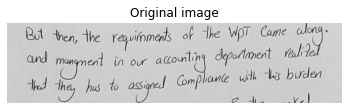

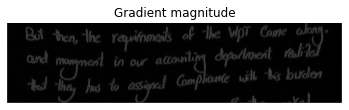

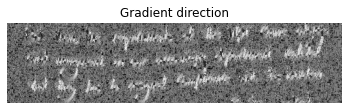

In [86]:
#-------------------- Testing gradient function --------------------------- 

img = np.array(color.rgb2gray(io.imread("F1/F1-10.jpg")))

gradient_magnitude,gradient_direction=gradient_info(img)

# print(magnitude.shape,direction.shape)

plt.figure(1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Original image")


plt.figure(2)
plt.imshow(gradient_magnitude, cmap="gray")
plt.axis("off")
plt.title("Gradient magnitude")

plt.figure(3)
plt.imshow(gradient_direction, cmap="gray")
plt.axis("off")
plt.title("Gradient direction")

In [87]:
# given an img divided into separated lines
# for each line, will divide it into 6 separate regions and compute gradient magnitude and direction for each region
def divide_line_to_regions(img):

    width= img.shape[1]
    w1=int(np.floor(width/3)) 
    w2=width- w1
    w3=width

    height=img.shape[0]
    height_upper_region= int(np.floor(height/2)) 
    height_lower_region= height

    region1= img[0:height_upper_region,0:w1]
    region2= img[0:height_upper_region,w1:w2]
    region3= img[0:height_upper_region,w2:w3]
    region4= img[height_upper_region:height_lower_region,0:w1]
    region5= img[height_upper_region:height_lower_region,w1:w2]
    region6= img[height_upper_region:height_lower_region,w2:w3]
    
    return region1,region2,region3,region4,region5,region6


(-0.5, 574.5, 206.5, -0.5)

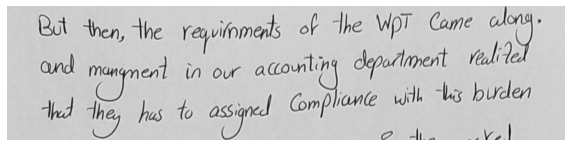

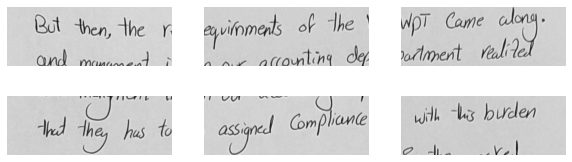

In [115]:
#-------------------- Testing dividing image into 6 regions --------------------------- 

line_img = np.array(color.rgb2gray(io.imread("F1/F1-10.jpg")))
region1,region2,region3,region4,region5,region6= divide_line_to_regions(line_img)  

plt.figure(1,figsize=[10, 5])
plt.imshow(line_img, cmap="gray")
plt.axis("off")

fig, axs = plt.subplots(2, 3, figsize=[10, 3])
plt.axis("off")
axs[0, 0].imshow(region1, cmap="gray")
axs[0, 0].axis('off')

axs[0, 1].imshow(region2, cmap="gray")
axs[0, 1].axis('off')

axs[0, 2].imshow(region3, cmap="gray")
axs[0, 2].axis('off')

axs[1, 0].imshow(region4, cmap="gray")
axs[1, 0].axis('off')

axs[1, 1].imshow(region5, cmap="gray")
axs[1, 1].axis('off')

axs[1, 2].imshow(region6, cmap="gray")
axs[1, 2].axis('off')


(-0.5, 574.5, 206.5, -0.5)

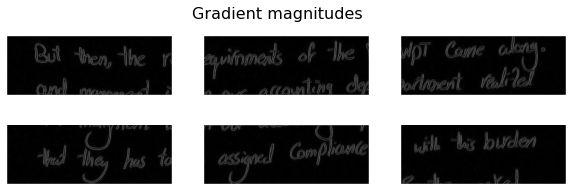

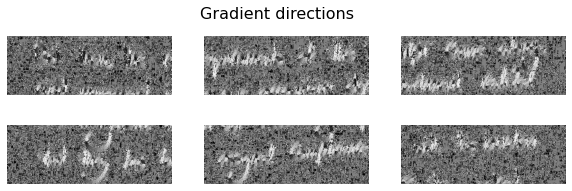

In [119]:

line_img = np.array(color.rgb2gray(io.imread("F1/F1-10.jpg")))
region1,region2,region3,region4,region5,region6= divide_line_to_regions(line_img)  

# ---------------------- Computing gradient for each region ----------------------

region1_gradient_magnitude,region1_gradient_direction=gradient_info(region1)
region2_gradient_magnitude,region2_gradient_direction=gradient_info(region2)
region3_gradient_magnitude,region3_gradient_direction=gradient_info(region3)
region4_gradient_magnitude,region4_gradient_direction=gradient_info(region4)
region5_gradient_magnitude,region5_gradient_direction=gradient_info(region5)
region6_gradient_magnitude,region6_gradient_direction=gradient_info(region6)


#---------------------- Plot gradient magnitude for each region -----------------

fig, axs = plt.subplots(2, 3, figsize=[10, 3])
fig.suptitle('Gradient magnitudes', fontsize=16)

axs[0, 0].imshow(region1_gradient_magnitude, cmap="gray")
axs[0, 0].axis('off')

axs[0, 1].imshow(region2_gradient_magnitude, cmap="gray")
axs[0, 1].axis('off')

axs[0, 2].imshow(region3_gradient_magnitude, cmap="gray")
axs[0, 2].axis('off')

axs[1, 0].imshow(region4_gradient_magnitude, cmap="gray")
axs[1, 0].axis('off')

axs[1, 1].imshow(region5_gradient_magnitude, cmap="gray")
axs[1, 1].axis('off')

axs[1, 2].imshow(region6_gradient_magnitude, cmap="gray")
axs[1, 2].axis('off')


#---------------------- Plot gradient direction for each region -----------------

fig, axs = plt.subplots(2, 3, figsize=[10, 3])
fig.suptitle('Gradient directions', fontsize=16)

axs[0, 0].imshow(region1_gradient_direction, cmap="gray")
axs[0, 0].axis('off')

axs[0, 1].imshow(region2_gradient_direction, cmap="gray")
axs[0, 1].axis('off')

axs[0, 2].imshow(region3_gradient_direction, cmap="gray")
axs[0, 2].axis('off')

axs[1, 0].imshow(region4_gradient_direction, cmap="gray")
axs[1, 0].axis('off')

axs[1, 1].imshow(region5_gradient_direction, cmap="gray")
axs[1, 1].axis('off')

axs[1, 2].imshow(region6_gradient_direction, cmap="gray")
axs[1, 2].axis('off')

